# <b><span style='color:#F1A424'>AutoChurn - Bank Churn Prediction</span> </b>

### Disclaimer
Please note, the Vantage Functions via SQLAlchemy feature is a preview/beta code release with limited functionality (the “Code”). As such, you acknowledge that the Code is experimental in nature and that the Code is provided “AS IS” and may not be functional on any machine or in any environment. TERADATA DISCLAIMS ALL WARRANTIES RELATING TO THE CODE, EXPRESS OR IMPLIED, INCLUDING, BUT NOT LIMITED TO, ANY WARRANTIES AGAINST INFRINGEMENT OF THIRD-PARTY RIGHTS, MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE.

TERADATA SHALL NOT BE RESPONSIBLE OR LIABLE WITH RESPECT TO ANY SUBJECT MATTER OF THE CODE UNDER ANY CONTRACT, NEGLIGENCE, STRICT LIABILITY OR OTHER THEORY 
    (A) FOR LOSS OR INACCURACY OF DATA OR COST OF PROCUREMENT OF SUBSTITUTE GOODS, SERVICES OR TECHNOLOGY, OR 
    (B) FOR ANY INDIRECT, INCIDENTAL OR CONSEQUENTIAL DAMAGES INCLUDING, BUT NOT LIMITED TO LOSS OF REVENUES AND LOSS OF PROFITS. TERADATA SHALL NOT BE RESPONSIBLE FOR ANY MATTER BEYOND ITS REASONABLE CONTROL.

Notwithstanding anything to the contrary: 
    (a) Teradata will have no obligation of any kind with respect to any Code-related comments, suggestions, design changes or improvements that you elect to provide to Teradata in either verbal or written form (collectively, “Feedback”), and 
    (b) Teradata and its affiliates are hereby free to use any ideas, concepts, know-how or techniques, in whole or in part, contained in Feedback: 
        (i) for any purpose whatsoever, including developing, manufacturing, and/or marketing products and/or services incorporating Feedback in whole or in part, and 
        (ii) without any restrictions or limitations, including requiring the payment of any license fees, royalties, or other consideration. 

## <b> Problem overview:</b>
    

**Dataset used - Bank Churn Dataset**

**Features**:

- `customer_id`: customer_id .
- `credit_score`: credit score of customer.
- `country`: country of customer.
- `gender`: Gender of customer.
- `age`: Age of customer.
- `tenure`: tenure.
- `balance`: bank balance.
- `products_number`: products number.
- `credit_card`: having credit card or not.
- `active_member`: active member or not.
- `estimated_salary`: Estimated salary of customer..

**Target Variable**:

- `churn`: 1 if the client has left the bank during some period or 0 if he/she has not.

        
**Objective**:

The primary objective is typically to build a model that can accurately predict the Customer Churn for ABC Bank.

**Usecase**:

Here, we will use AutoChurn(Automated Machine Learning for Churn Prediction) functionality to automate the entire process of developing a predictive model. It will perform feature exploration, feature engineering, data preparation, model training and evaluation on dataset in auto run and at end we will get leaderboard containined different models along with their performance. Model will also have rank associated with them which indicates which is best performing model for given data followed by other models.

In [1]:
# Importing AutoML from teradataml
from teradataml import AutoML, AutoChurn

In [2]:
# Importing other important libraries
import getpass
from teradataml import create_context, remove_context
from teradataml import DataFrame
from teradataml import load_example_data
from teradataml import TrainTestSplit

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
host = getpass.getpass("Host: ")
username = getpass.getpass("Username: ")
password = getpass.getpass("Password: ")

con = create_context(host=host, username=username, password=password)

## <b><span style='color:#F1A424'>| 1.</span> Loading Deployed Models - 'top_10_models' </b>

### <b><span style='color:#F1A424'>| 1.1.</span> Loading Model </b>

In [6]:
# Creating AutoML object

aml=AutoChurn()

In [7]:
# Loading models

models_1 = aml.load('top_10_models')

In [8]:
# Display loaded models

models_1

,RANK,MODEL_ID,FEATURE_SELECTION,ACCURACY,MICRO-PRECISION,MICRO-RECALL,MICRO-F1,MACRO-PRECISION,MACRO-RECALL,MACRO-F1,WEIGHTED-PRECISION,WEIGHTED-RECALL,WEIGHTED-F1,DATA_TABLE
0,1,KNN_4,rfe,0.845669,0.845669,0.845669,0.845669,0.846295,0.845669,0.845600,0.846295,0.845669,0.845600,ml__churn_rfe_1741339985631502
1,2,KNN_0,lasso,0.845669,0.845669,0.845669,0.845669,0.846295,0.845669,0.845600,0.846295,0.845669,0.845600,ml__churn_lasso_1741341637611918
2,3,KNN_9,lasso,0.839764,0.839764,0.839764,0.839764,0.840270,0.839764,0.839704,0.840270,0.839764,0.839704,ml__churn_lasso_1741341637611918
3,4,KNN_13,rfe,0.839764,0.839764,0.839764,0.839764,0.840270,0.839764,0.839704,0.840270,0.839764,0.839704,ml__churn_rfe_1741339985631502
4,5,XGBOOST_2,pca,0.805000,0.805000,0.805000,0.805000,0.694758,0.635891,0.653486,0.782540,0.805000,0.787815,ml__churn_pca_1741340904598898
5,6,DECISIONFOREST_2,pca,0.794375,0.794375,0.794375,0.794375,0.666889,0.594579,0.608156,0.761197,0.794375,0.766518,ml__churn_pca_1741340904598898
6,7,DECISIONFOREST_1,rfe,0.793307,0.793307,0.793307,0.793307,0.805629,0.793307,0.791203,0.805629,0.793307,0.791203,ml__churn_rfe_1741339985631502
7,8,DECISIONFOREST_0,lasso,0.792913,0.792913,0.792913,0.792913,0.805118,0.792913,0.790822,0.805118,0.792913,0.790822,ml__churn_lasso_1741341637611918
8,9,DECISIONFOREST_3,lasso,0.792913,0.792913,0.792913,0.792913,0.805118,0.792913,0.790822,0.805118,0.792913,0.790822,ml__churn_lasso_1741341637611918
9,10,XGBOOST_1,rfe,0.759449,0.759449,0.759449,0.759449,0.793933,0.759449,0.752180,0.793933,0.759449,0.752180,ml__churn_rfe_1741339985631502


In [9]:
### Loading Dataset for Prediction

load_example_data('teradataml','bank_churn')
df = DataFrame('bank_churn')

In [10]:
# Display data

df

customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
15674811,739,Germany,Male,29,3,59385.98,2,1,1,105533.96,0
15681316,681,France,Female,41,0,120549.29,2,1,0,175722.31,0
15797081,611,Germany,Female,49,9,115488.52,2,1,1,138656.81,1
15667633,612,France,Female,38,1,0.0,2,1,1,9209.21,0
15623566,714,France,Male,40,9,46520.69,1,1,1,96687.25,0
15585066,660,France,Female,43,1,0.0,1,0,1,112026.1,1
15629133,579,France,Female,27,9,0.0,2,1,0,126838.7,0
15706602,760,Spain,Female,33,1,118114.28,2,0,1,156660.21,0
15618203,773,Germany,Male,51,8,116197.65,2,1,1,86701.4,0
15603582,569,Spain,Female,34,3,0.0,1,1,0,133997.53,0


In [11]:
df.shape

(10000, 12)

### <b><span style='color:#F1A424'>| 1.2.</span> Generating Prediction & Performance Metrics</b>

In [12]:
# Generate prediction using some data rows and model rank

prediction = aml.predict(df.iloc[:80], rank=1)

Generating prediction using:
Model Name: KNN
Feature Selection: rfe
Completed: ｜⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿｜ 100% - 10/10           
Shap is not applicable for KNN


In [13]:
prediction

id,prediction,prob_1,prob_0,churn
24,0,0.0,1.0,0
84,0,0.0,1.0,0
100,0,0.0,1.0,0
16,0,0.0,1.0,0
32,0,0.0,1.0,0
4,0,3.076600786685443e-07,0.9999996923399214,0
12,0,0.0,1.0,0
40,0,0.0,1.0,0
28,0,0.0,1.0,0
36,0,0.0,1.0,0


In [14]:
# Generate performance metrics

performance_metric = aml.evaluate(df.iloc[:80], rank=1)

Generating performance metrics using:
Model Name: KNN
Feature Selection: rfe


In [15]:
performance_metric


############ output_data Output ############

   SeqNum              Metric  MetricValue
0       3        Micro-Recall     0.912500
1       5     Macro-Precision     0.880019
2       6        Macro-Recall     0.864695
3       7            Macro-F1     0.872000
4       9     Weighted-Recall     0.912500
5      10         Weighted-F1     0.911600
6       8  Weighted-Precision     0.911088
7       4            Micro-F1     0.912500
8       2     Micro-Precision     0.912500
9       1            Accuracy     0.912500


############ result Output ############

       Prediction  Mapping  CLASS_1  CLASS_2  Precision    Recall     F1  Support
SeqNum                                                                           
0               0  CLASS_1       59        4   0.936508  0.951613  0.944       62
1               1  CLASS_2        3       14   0.823529  0.777778  0.800       18


Generating prediction using:
Model Name: DECISIONFOREST
Feature Selection: rfe
Completed: ｜⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿｜ 100% - 10/10           
Applying SHAP for Model Interpretation (Load)...

SHAP Analysis Completed. Feature Importance Available.


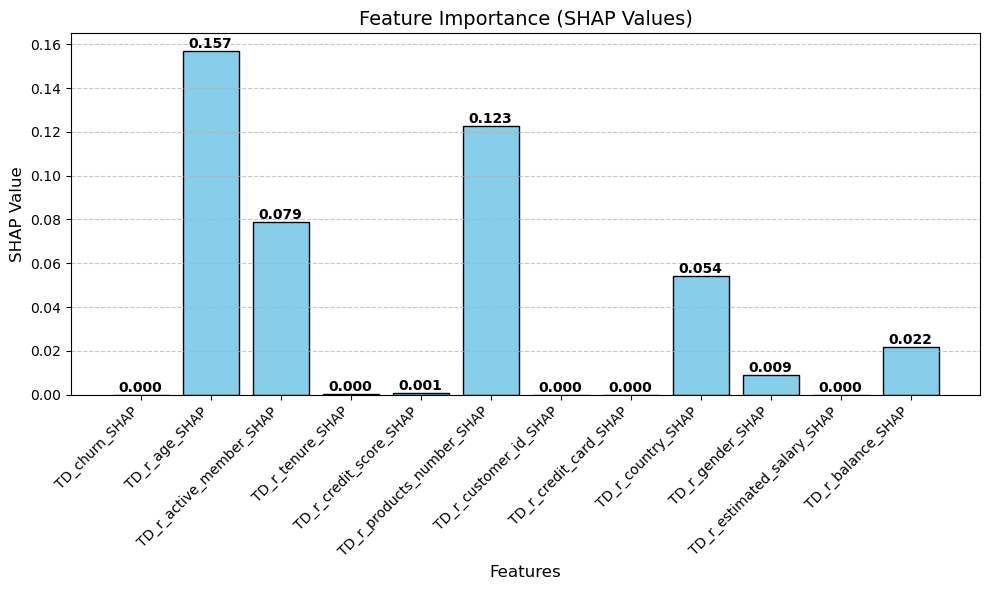

In [16]:
# Generate prediction using data and model rank

prediction = aml.predict(df.iloc[:80], rank=7)

In [17]:
prediction

id,prediction,prob_1,prob_0,churn
308,0,0.0,1.0,0
272,0,0.0,1.0,0
48,0,0.0,1.0,0
200,0,0.0,1.0,0
108,0,0.0,1.0,1
252,0,0.0,1.0,1
192,0,0.0,1.0,0
276,0,0.0,1.0,0
24,0,0.0,1.0,0
180,1,1.0,0.0,1


In [18]:
# Generate performance metrics

performance_metric = aml.evaluate(df.iloc[:80], rank=7)

Generating performance metrics using:
Model Name: DECISIONFOREST
Feature Selection: rfe


In [19]:
performance_metric


############ output_data Output ############

   SeqNum              Metric  MetricValue
0       3        Micro-Recall     0.825000
1       5     Macro-Precision     0.753247
2       6        Macro-Recall     0.709677
3       7            Macro-F1     0.726562
4       9     Weighted-Recall     0.825000
5      10         Weighted-F1     0.816797
6       8  Weighted-Precision     0.813961
7       4            Micro-F1     0.825000
8       2     Micro-Precision     0.825000
9       1            Accuracy     0.825000


############ result Output ############

       Prediction  Mapping  CLASS_1  CLASS_2  Precision    Recall        F1  Support
SeqNum                                                                              
0               0  CLASS_1       57        9   0.863636  0.919355  0.890625       62
1               1  CLASS_2        5        9   0.642857  0.500000  0.562500       18


## <b><span style='color:#F1A424'>| 2.</span> Loading Deployed Models - 'mixed_models' </b>

### <b><span style='color:#F1A424'>| 2.1.</span> Loading Model </b>

In [20]:
churn = AutoChurn()

In [21]:
# Loading models

models_2 = churn.load('mixed_models')

In [22]:
models_2

,RANK,MODEL_ID,FEATURE_SELECTION,ACCURACY,MICRO-PRECISION,MICRO-RECALL,MICRO-F1,MACRO-PRECISION,MACRO-RECALL,MACRO-F1,WEIGHTED-PRECISION,WEIGHTED-RECALL,WEIGHTED-F1,DATA_TABLE
0,1,KNN_0,lasso,0.845669,0.845669,0.845669,0.845669,0.846295,0.845669,0.845600,0.846295,0.845669,0.845600,ml__churn_lasso_1741343280126336
1,2,XGBOOST_2,pca,0.805000,0.805000,0.805000,0.805000,0.694758,0.635891,0.653486,0.782540,0.805000,0.787815,ml__churn_pca_1741347858689067
2,3,DECISIONFOREST_2,pca,0.794375,0.794375,0.794375,0.794375,0.666889,0.594579,0.608156,0.761197,0.794375,0.766518,ml__churn_pca_1741347858689067
3,4,DECISIONFOREST_3,lasso,0.792913,0.792913,0.792913,0.792913,0.805118,0.792913,0.790822,0.805118,0.792913,0.790822,ml__churn_lasso_1741343280126336


### <b><span style='color:#F1A424'>| 2.2.</span> Generating Prediction & Performance Metrics</b>

Generating prediction using:
Model Name: DECISIONFOREST
Feature Selection: lasso
Completed: ｜⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿｜ 100% - 10/10           
Applying SHAP for Model Interpretation (Load)...

SHAP Analysis Completed. Feature Importance Available.


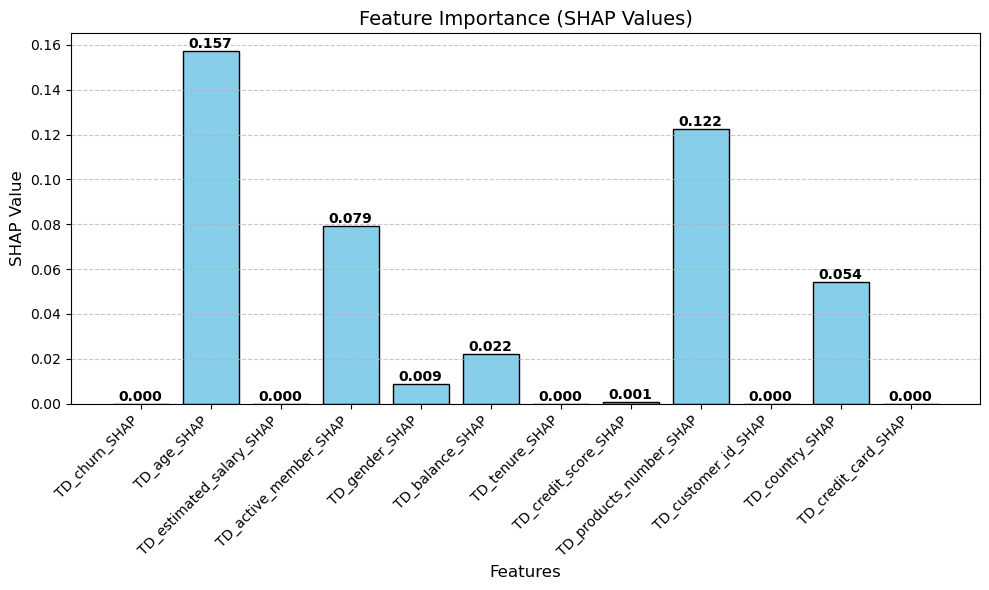

In [23]:
# Generate prediction using data and model rank

prediction = churn.predict(df.iloc[:80], rank=4)

In [24]:
prediction

id,prediction,prob_1,prob_0,churn
196,0,0.0,1.0,0
200,0,0.0,1.0,0
108,0,0.0,1.0,1
252,0,0.0,1.0,1
260,1,1.0,0.0,1
80,0,0.0,1.0,0
144,0,0.0,1.0,0
236,0,0.0,1.0,0
192,0,0.0,1.0,0
24,0,0.0,1.0,0


In [25]:
# Generate performance metrics

performance_metric = churn.evaluate(df.iloc[:80], rank=4)

Generating performance metrics using:
Model Name: DECISIONFOREST
Feature Selection: lasso


In [26]:
performance_metric


############ output_data Output ############

   SeqNum              Metric  MetricValue
0       3        Micro-Recall     0.825000
1       5     Macro-Precision     0.753247
2       6        Macro-Recall     0.709677
3       7            Macro-F1     0.726562
4       9     Weighted-Recall     0.825000
5      10         Weighted-F1     0.816797
6       8  Weighted-Precision     0.813961
7       4            Micro-F1     0.825000
8       2     Micro-Precision     0.825000
9       1            Accuracy     0.825000


############ result Output ############

       Prediction  Mapping  CLASS_1  CLASS_2  Precision    Recall        F1  Support
SeqNum                                                                              
0               0  CLASS_1       57        9   0.863636  0.919355  0.890625       62
1               1  CLASS_2        5        9   0.642857  0.500000  0.562500       18


## <b><span style='color:#F1A424'>| 3.</span> Loading Deployed Models - 'range_models' </b>

### <b><span style='color:#F1A424'>| 3.1.</span> Loading Model</b>

In [27]:
# Creating another AutoML object

obj=AutoChurn()

In [28]:
# Loading models

models_3 = obj.load('range_models')

In [29]:
models_3

,RANK,MODEL_ID,FEATURE_SELECTION,ACCURACY,MICRO-PRECISION,MICRO-RECALL,MICRO-F1,MACRO-PRECISION,MACRO-RECALL,MACRO-F1,WEIGHTED-PRECISION,WEIGHTED-RECALL,WEIGHTED-F1,DATA_TABLE
0,1,DECISIONFOREST_0,lasso,0.792913,0.792913,0.792913,0.792913,0.805118,0.792913,0.790822,0.805118,0.792913,0.790822,ml__churn_lasso_1741340722563022
1,2,DECISIONFOREST_3,lasso,0.792913,0.792913,0.792913,0.792913,0.805118,0.792913,0.790822,0.805118,0.792913,0.790822,ml__churn_lasso_1741340722563022
2,3,XGBOOST_1,rfe,0.759449,0.759449,0.759449,0.759449,0.793933,0.759449,0.752180,0.793933,0.759449,0.752180,ml__churn_rfe_1741340983608123
3,4,XGBOOST_0,lasso,0.752756,0.752756,0.752756,0.752756,0.790923,0.752756,0.744372,0.790923,0.752756,0.744372,ml__churn_lasso_1741340722563022


### <b><span style='color:#F1A424'>| 3.2.</span> Generating Prediction & Performance Metrics</b>

Generating prediction using:
Model Name: DECISIONFOREST
Feature Selection: lasso
Completed: ｜⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿｜ 100% - 10/10           
Applying SHAP for Model Interpretation (Load)...

SHAP Analysis Completed. Feature Importance Available.


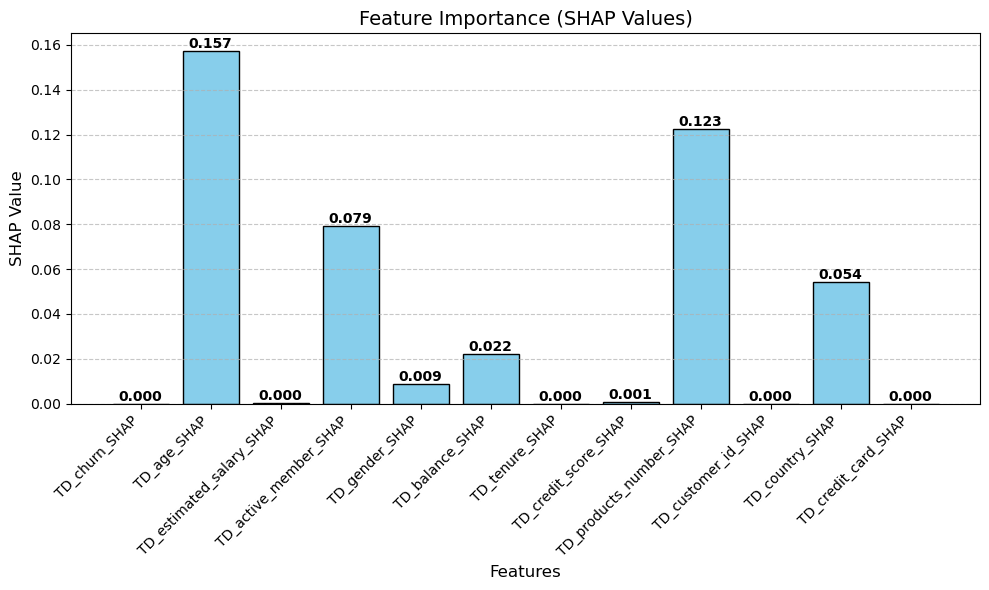

In [30]:
# Generate prediction using data and model rank

prediction = obj.predict(df.iloc[:80], rank=1)

In [31]:
prediction

id,prediction,prob_1,prob_0,churn
48,0,0.0,1.0,0
144,0,0.0,1.0,0
308,0,0.0,1.0,0
252,0,0.0,1.0,1
276,0,0.0,1.0,0
200,0,0.0,1.0,0
24,0,0.0,1.0,0
108,0,0.0,1.0,1
192,0,0.0,1.0,0
80,0,0.0,1.0,0


In [32]:
# Generate performance metrics

performance_metric = obj.evaluate(df.iloc[:80], rank=1)

Generating performance metrics using:
Model Name: DECISIONFOREST
Feature Selection: lasso


In [33]:
performance_metric


############ output_data Output ############

   SeqNum              Metric  MetricValue
0       3        Micro-Recall     0.825000
1       5     Macro-Precision     0.753247
2       6        Macro-Recall     0.709677
3       7            Macro-F1     0.726562
4       9     Weighted-Recall     0.825000
5      10         Weighted-F1     0.816797
6       8  Weighted-Precision     0.813961
7       4            Micro-F1     0.825000
8       2     Micro-Precision     0.825000
9       1            Accuracy     0.825000


############ result Output ############

       Prediction  Mapping  CLASS_1  CLASS_2  Precision    Recall        F1  Support
SeqNum                                                                              
1               1  CLASS_2        5        9   0.642857  0.500000  0.562500       18
0               0  CLASS_1       57        9   0.863636  0.919355  0.890625       62


In [ ]:
remove_context()